In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
a3c_test_file='pacman_a3c_test20210321-133837.csv'
a3c_train_file='pacman_a3c_train20210321-133837.csv'
ppo_test_file='PPO_train20210311-101629.csv'
ppo_train_file='PPO_test20210311-101629.csv'


a3c_test = pd.read_csv(a3c_test_file)
#a3c_test
a3c_train = pd.read_csv(a3c_train_file)

ppo_train = pd.read_csv(ppo_test_file)
ppo_test = pd.read_csv(ppo_train_file)

#get_game =

a3c_train['AverageReward'] = a3c_train.groupby('Steps')['TotalReward'].transform('mean')

a3c_train=a3c_train.sort_values(by=['Steps'])

#a3c_train

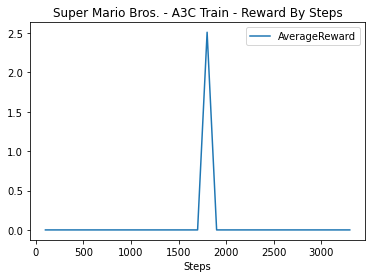

In [21]:
a3c_train_graph= a3c_train.plot(x='Steps',y='AverageReward',title="Super Mario Bros. - A3C Train - Reward By Steps")

#plt.savefig('a3c_train_graph1.png')

<AxesSubplot:title={'center':'A3C Test - Reward By Steps'}, xlabel='Time'>

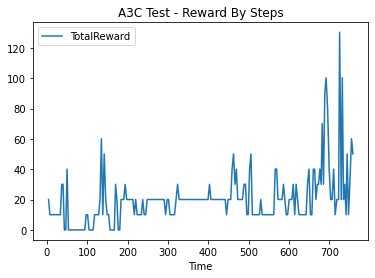

In [22]:

a3c_test.plot(x='Time',y='TotalReward',title="A3C Test - Reward By Steps")

Text(0, 0.5, 'Reward')

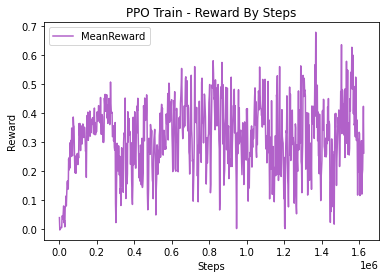

In [14]:
ppo_train_graph = ppo_train.plot(x='Steps',y='MeanReward',title="PPO Train - Reward By Steps",color='#b161c9')
ppo_train_graph.set_ylabel("Reward")

<AxesSubplot:title={'center':'PPO Test - Reward By Steps'}, xlabel='Steps'>

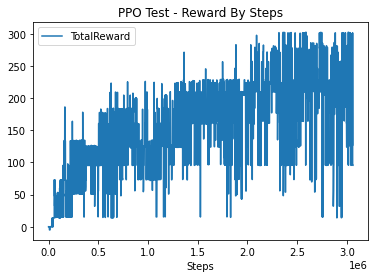

In [5]:
ppo_test.plot(x='Steps',y='TotalReward',title="PPO Test - Reward By Steps")